# Influence of the latent space dimension on the performances of VAE on MNIST

Here we want to invesigate how the latent space distribution influences the ability of the VAE to build an efficient representation of the MNIST digits in order to improve its performances.

Faire en sorte que l'étude soit très facile à mener, en réduisant le plus possible le code, et n'ayant besoin que de modifier un paramètre et de mesurer les performances. Faire un graphe avec abscisses : width (dimension sémantique) et ordonnée : autres dimensions (puisqu'on aura une matrice carrée à chaque fois) et tracer pour chaque couple la performance, qui doit être l'erreur de reconstruction moyenne sur le jeu de données de validation.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.random import normal
import tensorflow.keras as keras

from tensorflow.keras import Model, Input, layers
from tensorflow.keras.datasets import mnist

print(tf.__version__)

!nvidia-smi

2.2.0
Thu Jul  2 17:53:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = np.expand_dims(x_train, -1).astype("float32") / 255 # add width axis
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

x_val = x_train[-10000]
x_train = x_train[:-10000]

In [3]:
# mount google drive: follow the link, choose the account that contains the dataset and paste token in the displayed field
from google.colab import drive
import os
import sys 

drive_folder = "BACMMAN_DISTNET/UAD/MNIST/"

def mount_drive():
  drive.mount('/content/driveDL', force_remount=True)
  os.chdir("/content/driveDL/My Drive/"+drive_folder)
mount_drive()

Mounted at /content/driveDL


In [4]:
from MNIST_anomalies import set_anomaly, predict_anomalies, contour_anomalies, plot_anomalies
from MNIST_anomalies import plot_predictions
from LS_dim_MNIST import Sampling, VAE

In [6]:
vae = VAE(latent_dim)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(x_train, epochs=7, batch_size=128)

Epoch 1/7
391/391 [==============================] - 9s 23ms/step - loss: 186.5994 - reconstruction_loss: 185.1889 - kl_loss: 1.4105
Epoch 2/7
391/391 [==============================] - 9s 22ms/step - loss: 99.2027 - reconstruction_loss: 96.5749 - kl_loss: 2.6278
Epoch 3/7
391/391 [==============================] - 9s 22ms/step - loss: 85.6965 - reconstruction_loss: 83.0151 - kl_loss: 2.6815
Epoch 4/7
391/391 [==============================] - 9s 23ms/step - loss: 80.2314 - reconstruction_loss: 77.5841 - kl_loss: 2.6473
Epoch 5/7
391/391 [==============================] - 9s 22ms/step - loss: 76.8316 - reconstruction_loss: 74.1956 - kl_loss: 2.6360
Epoch 6/7
391/391 [==============================] - 9s 22ms/step - loss: 74.2460 - reconstruction_loss: 71.5977 - kl_loss: 2.6483
Epoch 7/7
391/391 [==============================] - 9s 22ms/step - loss: 72.1478 - reconstruction_loss: 69.4948 - kl_loss: 2.6530


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs

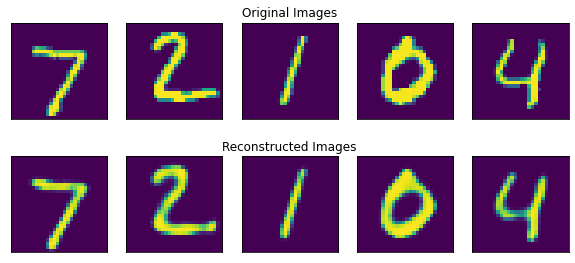

In [8]:
# x_test = np.squeeze(x_test, axis=-1)
# x_test = x_test * 255
plot_predictions(vae, x_test, n=5, dims=(28, 28, 1))